In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import pickle

In [2]:
# Step 1: Load the dataset
df = pd.read_csv("UpdatedResumeDataSet.csv")
print("Sample rows:\n", df.head())
print("Categories:\n", df['Category'].value_counts())

Sample rows:
        Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
Categories:
 Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Enginee

In [3]:
# Step 2: Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text

df['Cleaned_Resume'] = df['Resume'].apply(clean_text)


In [4]:
# Step 3: Label Encoding
le = LabelEncoder()
df['Encoded_Label'] = le.fit_transform(df['Category'])

In [5]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Resume'], df['Encoded_Label'], test_size=0.2, random_state=42, stratify=df['Encoded_Label'])

In [6]:
# Step 5: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [7]:
# Step 6: Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [8]:
# Step 7: Predict & evaluate
y_pred = model.predict(X_test_tfidf)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy : {acc:.2f}")
print(f"✅ Precision: {prec:.2f}")
print(f"✅ Recall   : {rec:.2f}")
print(f"✅ F1 Score : {f1:.2f}")
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


✅ Accuracy : 0.99
✅ Precision: 1.00
✅ Recall   : 0.99
✅ F1 Score : 0.99

📋 Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.83      1.00      0.91         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR    

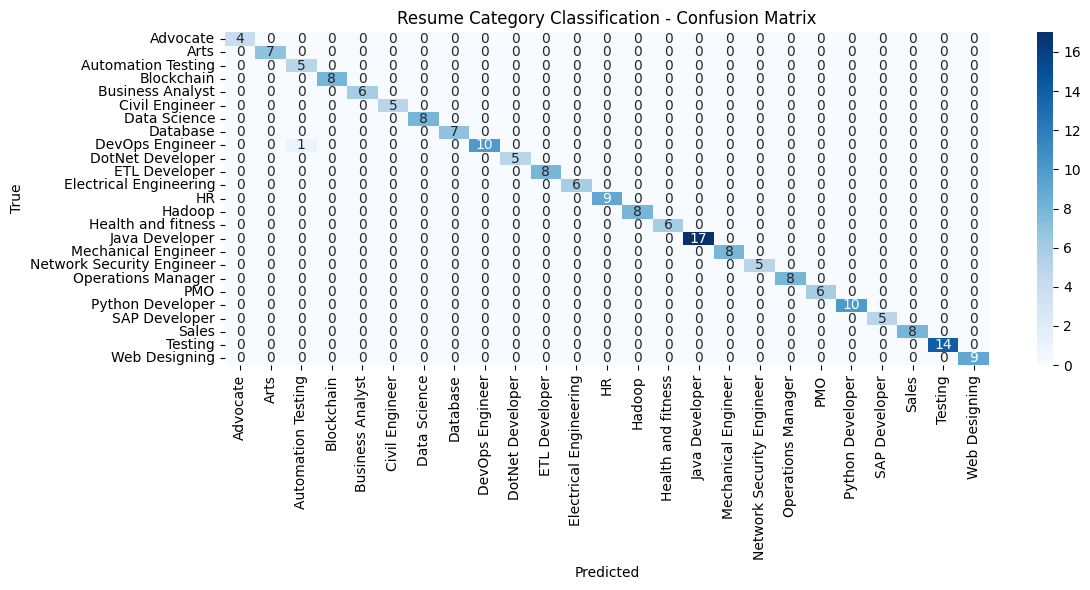

In [9]:
# Step 8: Confusion matrix
plt.figure(figsize=(12,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Resume Category Classification - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig("resume_confusion_matrix.png")
plt.show()

In [10]:
# Save model, vectorizer, and label encoder
pickle.dump(model, open("resume_model.pkl", "wb"))
pickle.dump(tfidf, open("resume_vectorizer.pkl", "wb"))
pickle.dump(le, open("resume_label_encoder.pkl", "wb"))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yuvan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


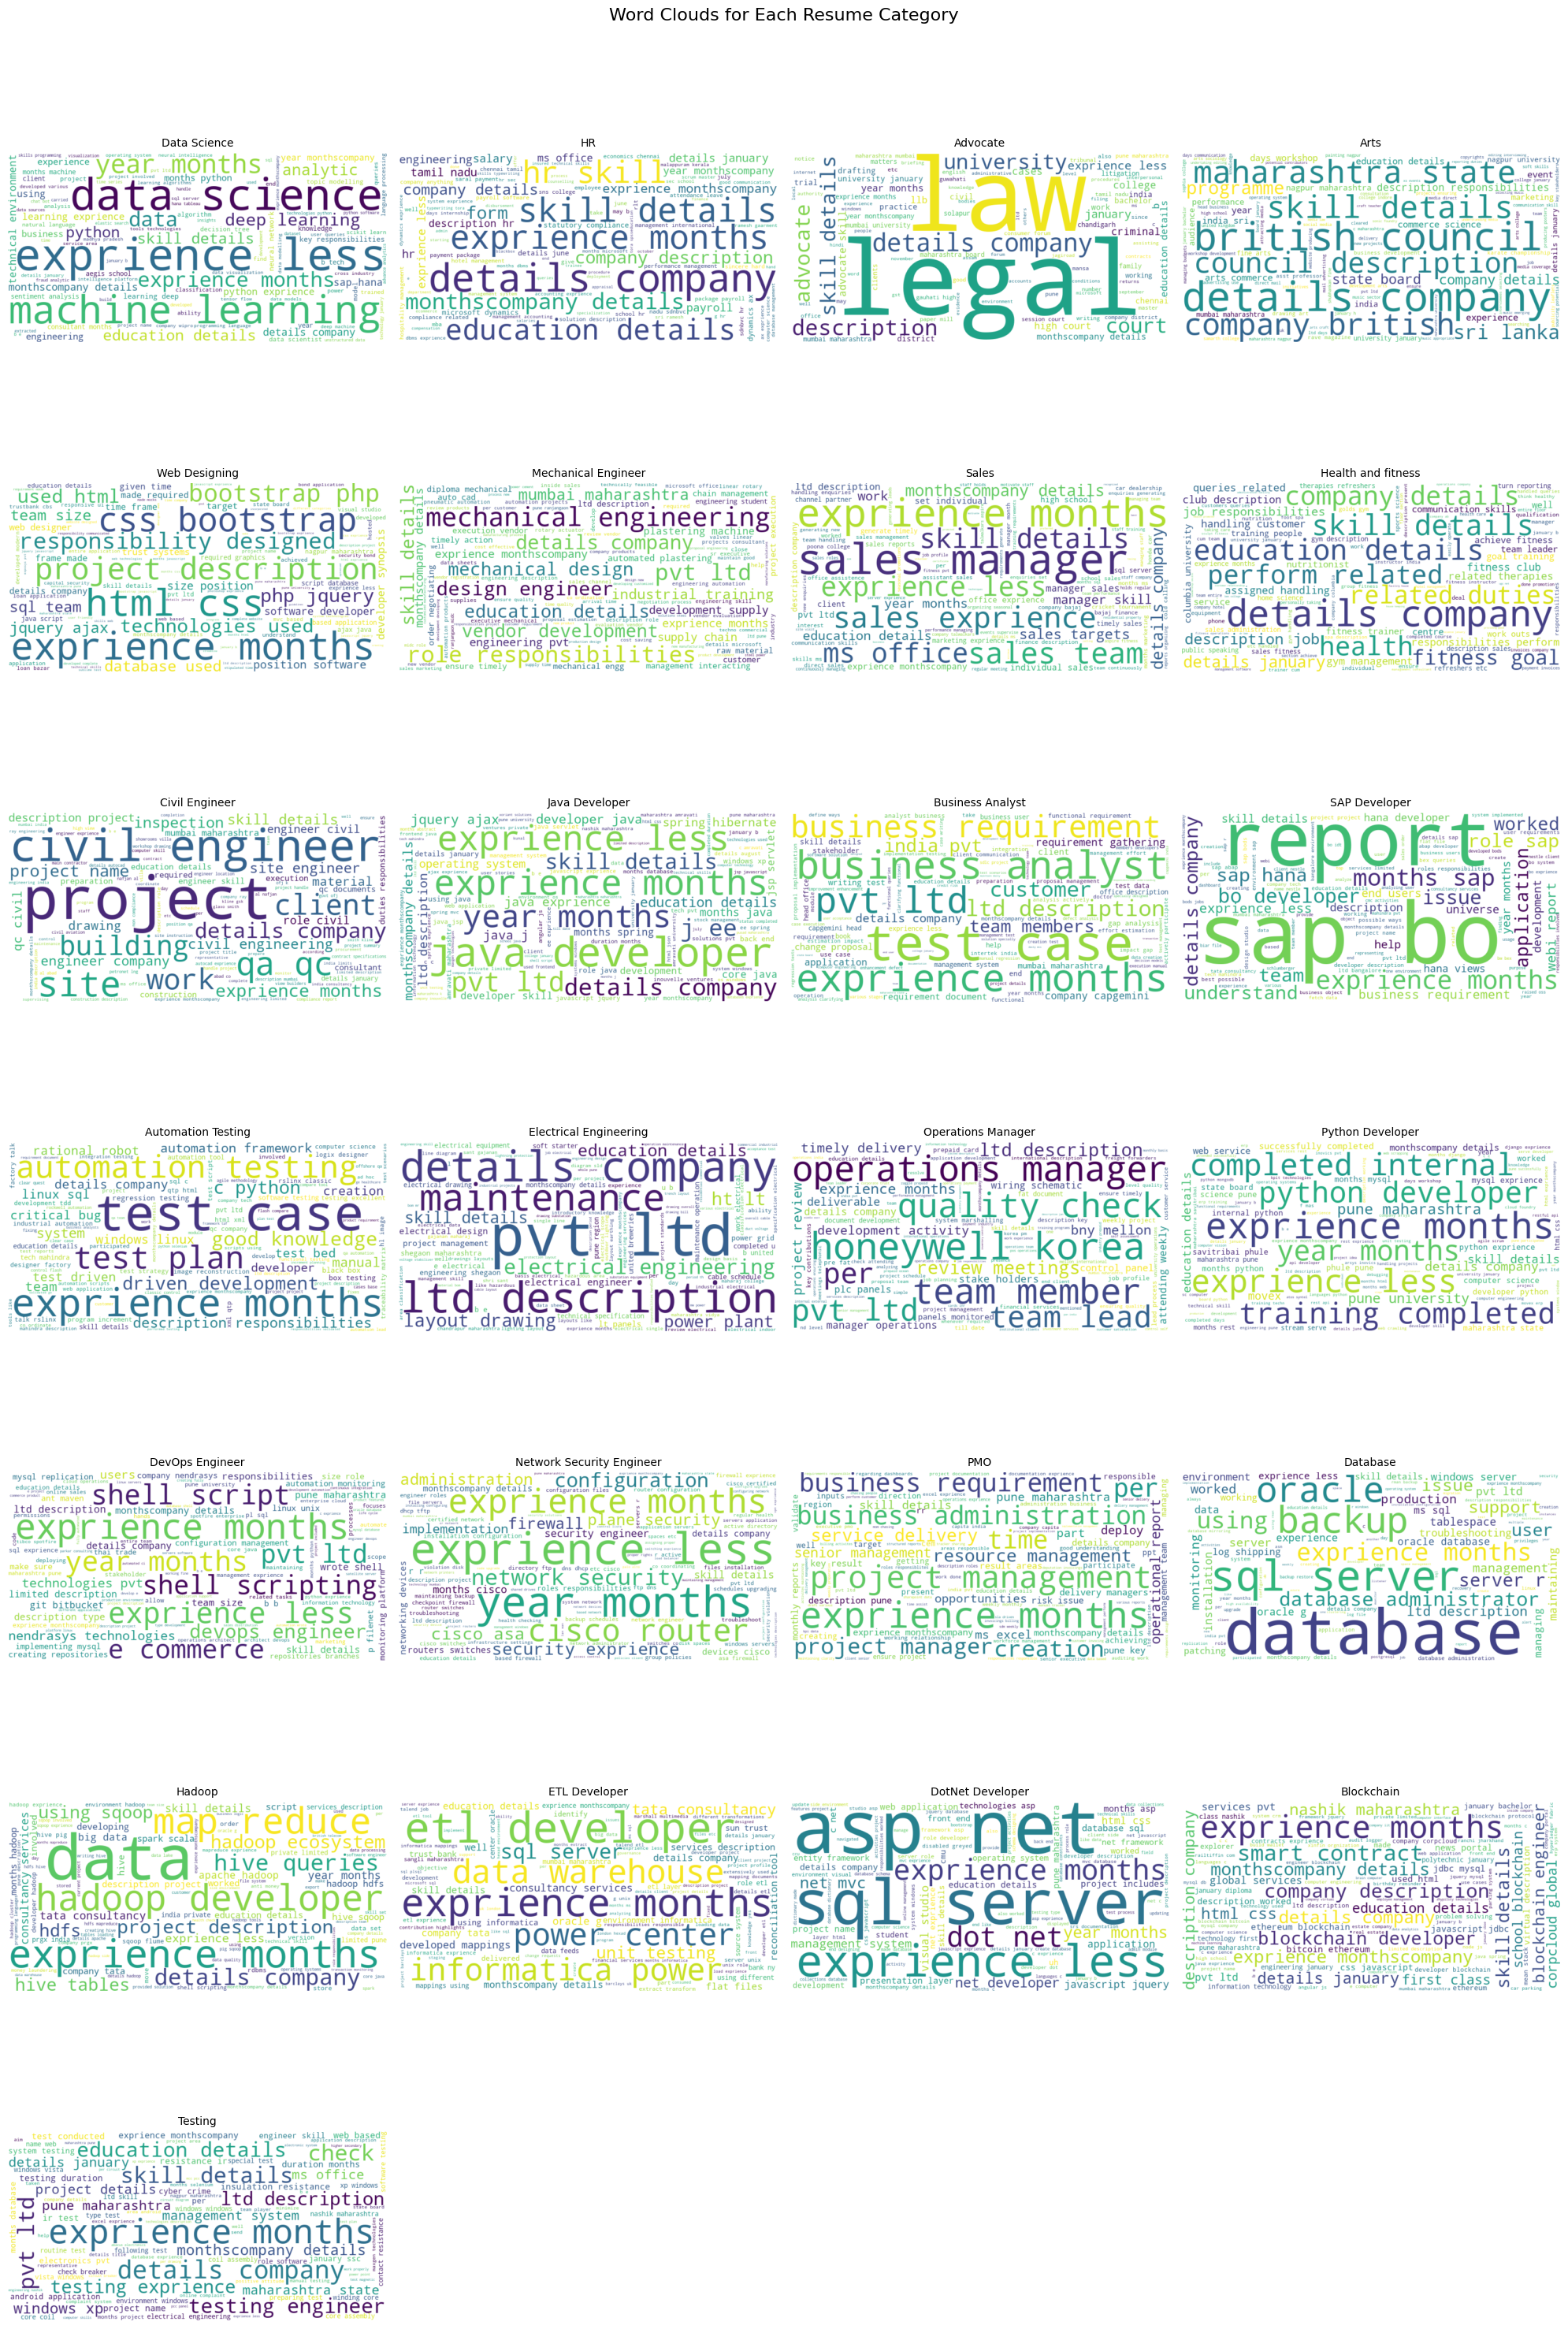

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already present
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Unique job categories
categories = df['Category'].unique()

# Plot word clouds (4 per row)
plt.figure(figsize=(20, len(categories) // 4 * 5))

for idx, label in enumerate(categories):
    text = " ".join(df[df['Category'] == label]['Cleaned_Resume'].values)
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=stop_words, max_words=100).generate(text)
    
    plt.subplot(len(categories) // 4 + 1, 4, idx + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(label, fontsize=10)

plt.tight_layout()
plt.suptitle("Word Clouds for Each Resume Category", fontsize=16, y=1.02)
plt.show()

